# Running PickedGroupFDR as a Python module

We will analyze a dataset with deep proteome sequencing using multiple proteases (Sinitcyn, 2020).

1. Download and unpack the MaxQuant and Oktoberfest results

In [6]:
# TODO: download from Zenodo and extract to example data folder.

input_folder = "./example_data"
output_folder = f"{input_folder}/notebook_results"

output_dir_combined = f"{output_folder}/picked_group_fdr_combined"

proteases = ['trypsin', 'chymotrypsin', 'LysC', 'LysN']

2. Import the `pipeline` module of the PickedGroupFDR package, as well as the `DigestionParams` class.

In [2]:
from pathlib import Path

import picked_group_fdr.pipeline as picked_group_fdr
from picked_group_fdr.digestion_params import DigestionParams

3. Update the MaxQuant evidence files with the rescored PSMs from Oktoberfest using the `run_update_evidence` method.

In [3]:
evidence_files, evidence_files_rescored = [], []
for protease in proteases:
    evidence_file = f"{input_folder}/{protease}/maxquant/combined/txt/evidence.txt"
    rescored_target_psms = f"{input_folder}/{protease}/oktoberfest/results/percolator/rescore.percolator.psms.txt"
    rescored_decoy_psms = f"{input_folder}/{protease}/oktoberfest/results/percolator/rescore.percolator.decoy.psms.txt"
    output_dir_protease = f"{output_folder}/{protease}/picked_group_fdr"
    
    Path(output_dir_protease).mkdir(parents=True, exist_ok=True)

    evidence_file_rescored = f"{output_dir_protease}/evidence.txt"

    picked_group_fdr.run_update_evidence(
        [evidence_file],
        [rescored_target_psms, rescored_decoy_psms],
        [evidence_file_rescored],
        "prosit",
    )

    evidence_files.append(evidence_file)
    evidence_files_rescored.append(evidence_file_rescored)

2023-10-28 11:16:56,005 - INFO - UpdateEvidence version 0.4.0
Copyright (c) 2020-2023 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@tum.de) at the
Chair of Proteomics and Bioanalytics at the Technical University of Munich.
2023-10-28 11:16:56,006 - INFO - Issued command: update_evidence_from_pout.py --mq_evidence ./example_data/trypsin/maxquant/combined/txt/evidence.txt --perc_results ./example_data/trypsin/oktoberfest/results/percolator/rescore.percolator.psms.txt ./example_data/trypsin/oktoberfest/results/percolator/rescore.percolator.decoy.psms.txt --mq_evidence_out ./example_data/notebook_results/trypsin/picked_group_fdr/evidence.txt --pout_input_type prosit
2023-10-28 11:16:56,009 - INFO - Processing ./example_data/trypsin/oktoberfest/results/percolator/rescore.percolator.psms.txt
2023-10-28 11:16:56,071 - INFO - Parsing Percolator output file
2023-10-28 11:16:56,072 - INFO -     Reading line 0
2023-10-28 11:16:58,828 - INFO -     Reading line 500000
2023-1

4. Process the updated evidence files with PickedGroupFDR using the `run_picked_group_fdr` method. Also process the original MaxQuant evidence files, so we can compare the results later.

In [4]:
protein_groups_out = f"{output_dir_combined}/rescore.proteinGroups.txt"
fasta_files = [
    f"{input_folder}/fasta/UP000005640_9606.fasta",
    f"{input_folder}/fasta/UP000005640_9606_additional.fasta",
    f"{input_folder}/fasta/Homo_sapiens.GRCh38.pep.abinitio.fa",
    f"{input_folder}/fasta/Homo_sapiens.GRCh38.pep.all.fa",
]
digest_params_list = [
    DigestionParams("trypsinp", "full", 7, 60, 2, "KR", False),
    DigestionParams("chymotrypsin+", "full", 7, 60, 4, "none", False),
    DigestionParams("lys-cp", "full", 7, 60, 2, "K", False),
    DigestionParams("lys-n", "full", 7, 60, 2, "K", False),
]
do_quant = True
lfq_min_peptide_ratios = 1

In [5]:
Path(protein_groups_out).parent.mkdir(parents=True, exist_ok=True)

picked_group_fdr.run_picked_group_fdr(
    evidence_files_rescored,
    protein_groups_out,
    fasta_files,
    digest_params_list,
    do_quant,
    lfq_min_peptide_ratios,
)

2023-10-28 11:24:23,082 - INFO - PickedGroupFDR version 0.4.0
Copyright (c) 2020-2023 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@tum.de) at the
Chair of Proteomics and Bioanalytics at the Technical University of Munich.
2023-10-28 11:24:23,083 - INFO - Issued command: picked_group_fdr.py --mq_evidence ./example_data/notebook_results/trypsin/picked_group_fdr/evidence.txt ./example_data/notebook_results/chymotrypsin/picked_group_fdr/evidence.txt ./example_data/notebook_results/LysC/picked_group_fdr/evidence.txt ./example_data/notebook_results/LysN/picked_group_fdr/evidence.txt --methods picked_protein_group_mq_input --do_quant --protein_groups_out ./example_data/notebook_results/picked_group_fdr_combined/rescore.proteinGroups.txt --fasta ./example_data/fasta/UP000005640_9606.fasta ./example_data/fasta/UP000005640_9606_additional.fasta ./example_data/fasta/Homo_sapiens.GRCh38.pep.abinitio.fa ./example_data/fasta/Homo_sapiens.GRCh38.pep.all.fa --min-length 7 7 7 

In [6]:
protein_groups_original_out = f"{output_dir_combined}/original.proteinGroups.txt"

picked_group_fdr.run_picked_group_fdr(
    evidence_files,
    protein_groups_original_out,
    fasta_files,
    digest_params_list,
    do_quant,
    lfq_min_peptide_ratios,
)

2023-10-28 11:51:08,221 - INFO - PickedGroupFDR version 0.4.0
Copyright (c) 2020-2023 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@tum.de) at the
Chair of Proteomics and Bioanalytics at the Technical University of Munich.
2023-10-28 11:51:08,223 - INFO - Issued command: picked_group_fdr.py --mq_evidence ./example_data/trypsin/maxquant/combined/txt/evidence.txt ./example_data/chymotrypsin/maxquant/combined/txt/evidence.txt ./example_data/LysC/maxquant/combined/txt/evidence.txt ./example_data/LysN/maxquant/combined/txt/evidence.txt --methods picked_protein_group_mq_input --do_quant --protein_groups_out ./example_data/notebook_results/picked_group_fdr_combined/original.proteinGroups.txt --fasta ./example_data/fasta/UP000005640_9606.fasta ./example_data/fasta/UP000005640_9606_additional.fasta ./example_data/fasta/Homo_sapiens.GRCh38.pep.abinitio.fa ./example_data/fasta/Homo_sapiens.GRCh38.pep.all.fa --min-length 7 7 7 7 --max-length 60 60 60 60 --cleavages 2 4 2 2 

5. Filter the results at 1% FDR using the `run_filter_fdr_maxquant` method.

In [7]:
protein_groups_file_filtered = f"{output_dir_combined}/rescore.proteinGroups.fdr1.txt"
picked_group_fdr.run_filter_fdr_maxquant([protein_groups_out], protein_groups_file_filtered, fdr_cutoff=0.01)

2023-10-28 12:18:45,530 - INFO - FilterFDR version 0.4.0
Copyright (c) 2020-2023 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@tum.de) at the
Chair of Proteomics and Bioanalytics at the Technical University of Munich.
2023-10-28 12:18:45,532 - INFO - Issued command: filter_fdr_maxquant.py --mq_protein_groups ./example_data/notebook_results/picked_group_fdr_combined/rescore.proteinGroups.txt --mq_protein_groups_out ./example_data/notebook_results/picked_group_fdr_combined/rescore.proteinGroups.fdr1.txt --fdr_cutoff 0.01
2023-10-28 12:18:45,535 - INFO - Writing filtered protein groups results to: ./example_data/notebook_results/picked_group_fdr_combined/rescore.proteinGroups.fdr1.txt
2023-10-28 12:18:46,858 - INFO - Finished writing


In [8]:
protein_groups_file_original_filtered = f"{output_dir_combined}/original.proteinGroups.fdr1.txt"
picked_group_fdr.run_filter_fdr_maxquant([protein_groups_original_out], protein_groups_file_original_filtered, fdr_cutoff=0.01)

2023-10-28 12:18:47,248 - INFO - FilterFDR version 0.4.0
Copyright (c) 2020-2023 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@tum.de) at the
Chair of Proteomics and Bioanalytics at the Technical University of Munich.
2023-10-28 12:18:47,250 - INFO - Issued command: filter_fdr_maxquant.py --mq_protein_groups ./example_data/notebook_results/picked_group_fdr_combined/original.proteinGroups.txt --mq_protein_groups_out ./example_data/notebook_results/picked_group_fdr_combined/original.proteinGroups.fdr1.txt --fdr_cutoff 0.01
2023-10-28 12:18:47,253 - INFO - Writing filtered protein groups results to: ./example_data/notebook_results/picked_group_fdr_combined/original.proteinGroups.fdr1.txt
2023-10-28 12:18:48,381 - INFO - Finished writing


6. Compare the original results with the rescored results.

In [36]:
import pandas as pd
import numpy as np
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

Load the filtered protein groups results from the rescored results.

In [37]:
protein_groups_df = pd.read_csv(protein_groups_file_filtered, sep='\t')
protein_groups_df.head()

,Protein IDs,Majority protein IDs,Peptide counts (unique),Protein names,Gene names,Fasta headers,Best peptide,Number of proteins,Q-value,Score,...,Unique sequence coverage [%],Sequence coverage [%] LysC,Sequence coverage [%] LysN,Sequence coverage [%] chymotrypsin,Sequence coverage [%] trypsin,Evidence IDs,LFQ Intensity LysC,LFQ Intensity LysN,LFQ Intensity chymotrypsin,LFQ Intensity trypsin
0,ENSP00000221130.5;sp|P00390-2|GSHR_HUMAN;sp|P0...,ENSP00000221130.5;sp|P00390-2|GSHR_HUMAN;sp|P0...,92;92;92;83;80;73;86;73;80;83;21;21;16;16,pep:known chromosome:GRCh38:8:30678061:3072792...,;GSR,ENSP00000221130.5 pep:known chromosome:GRCh38:...,VMWNTAVHSEFMHDHADYGFPSCEGK,14,0.000098,13.132898,...,82.2,52.5,50.0,67.8,56.7,11128;11129;13186;13187;13188;13189;13190;1319...,44486778969,0,0,179792311941
1,ENSP00000347602.3;sp|P29374|ARI4A_HUMAN;tr|C9J...,ENSP00000347602.3;sp|P29374|ARI4A_HUMAN;sp|P29...,95;95;3;3;90;90;90;3;3;90;90;29;85;29;55;55,pep:known chromosome:GRCh38:14:58298385:583737...,;ARID4A,ENSP00000347602.3 pep:known chromosome:GRCh38:...,ISSFGQNEAGSEPHIEAHSLELSSLDNK,16,0.000098,12.997536,...,58.4,31.0,27.7,17.3,35.4,1648;1649;1650;4295;4296;16571;71440;223350;22...,3664677467,0,0,7972433533
2,ENSP00000262215.3;sp|Q9Y6D6|BIG1_HUMAN;tr|E5RJ...,ENSP00000262215.3;sp|Q9Y6D6|BIG1_HUMAN;GENSCAN...,95;95;10;89;10;66;66;35;35;11;11,pep:known chromosome:GRCh38:8:67197649:6734367...,;ARFGEF1,ENSP00000262215.3 pep:known chromosome:GRCh38:...,YLPPQTVDHISQEHEGDLDLHTNDVDK,11,0.000098,12.992940,...,48.2,10.5,7.1,18.1,33.7,907;10024;22307;22308;31232;71475;81847;81848;...,2630197791,0,0,16233958709
3,ENSP00000280701.3;GENSCAN00000017051;sp|Q9NWU1...,ENSP00000280701.3;GENSCAN00000017051;sp|Q9NWU1...,43;43;43;34;34;20;21;20;21;9;9;9,pep:known chromosome:GRCh38:3:25790080:2579453...,;OXSM,ENSP00000280701.3 pep:known chromosome:GRCh38:...,DAGVQPEEISYINAHATSTPLGDAAENK,12,0.000098,12.985622,...,74.7,34.0,33.1,24.8,71.7,712;713;46949;59370;59371;177842;177843;177844...,7049824283,0,0,16153924917
4,ENSP00000469113.1;ENSP00000366344.3;ENSP000003...,ENSP00000469113.1;ENSP00000366344.3;ENSP000003...,21;21;21;21;21;15;15;9;15;15;9;9;15;15;15;15;1...,pep:known chromosome:GRCh38:19:49659573:496658...,;IRF3,ENSP00000469113.1 pep:known chromosome:GRCh38:...,VGGASSLENTVDLHISNSHPLSLTSDQYK,43,0.000098,12.745408,...,59.3,9.1,6.8,22.5,47.5,78216;113800;113801;137776;137777;171651;17165...,2977394652,0,0,12068368648


Extract the summed intensities columns for the three proteases. In the MaxQuant output files, missing values are shown as zeros. Replace these by NaNs and do a log10 transformation on all remaining intensities to make the data easier to work with.

In [38]:
intensities = protein_groups_df[
    [f"Intensity {protease}" for protease in proteases]
]
intensities = intensities.replace(0, np.nan).apply(np.log10)
intensities = intensities.rename(columns=lambda x: x.replace("Intensity ", ""))
intensities.count()

trypsin         10717
chymotrypsin     8384
LysC             8315
LysN             8384
dtype: int64

The number of quantified protein groups for trypsin has increased by 6%, but for the other two proteases the gain is quite modest.

Load the results from the original MaxQuant results without rescoring by Oktoberfest.

In [39]:
protein_groups_original_df = pd.read_csv(protein_groups_file_original_filtered, sep='\t')
protein_groups_original_df.head()

,Protein IDs,Majority protein IDs,Peptide counts (unique),Protein names,Gene names,Fasta headers,Best peptide,Number of proteins,Q-value,Score,...,Unique sequence coverage [%],Sequence coverage [%] LysC,Sequence coverage [%] LysN,Sequence coverage [%] chymotrypsin,Sequence coverage [%] trypsin,Evidence IDs,LFQ Intensity LysC,LFQ Intensity LysN,LFQ Intensity chymotrypsin,LFQ Intensity trypsin
0,GENSCAN00000045458;sp|Q9NPL8|TIDC1_HUMAN;tr|C9...,GENSCAN00000045458;sp|Q9NPL8|TIDC1_HUMAN;tr|C9...,27;27;22;27;22;6;3;3;3;9;3;9;3;3;6;3;3,pep:genscan chromosome:GRCh38:3:119469022:1195...,;TIMMDC1,GENSCAN00000045458 pep:genscan chromosome:GRCh...,KIESSLQEDEPENDAK,17,0.000126,323.306215,...,19.6,13.4,9.5,6.6,17.4,152042;261449;261452;601815;601816;601817;6018...,8866652667,0,0,22073915733
1,ENSP00000295897.4;sp|P02768|ALBU_HUMAN;tr|B7WN...,ENSP00000295897.4;sp|P02768|ALBU_HUMAN;tr|B7WN...,9;9;9;9;9;9;9;9;9;9;9;9;9;9;9,pep:known chromosome:GRCh38:4:73404239:7342141...,;ALB,ENSP00000295897.4 pep:known chromosome:GRCh38:...,KADDKETCFAEEGK,15,0.000126,323.306215,...,4.3,3.4,4.3,0.0,4.1,27973;27974;27975;27976;27977;27979;27980;2798...,1865869901,21567915873,0,783683225
2,ENSP00000478212.1;ENSP00000443139.1;ENSP000004...,ENSP00000478212.1;ENSP00000443139.1;ENSP000004...,111;111;111;111;111;111;111;15;29;29;12;10;85;...,pep:known chromosome:GRCh38:17:57085717:571213...,;AKAP1,ENSP00000478212.1 pep:known chromosome:GRCh38:...,KTESFQNAQAGSNPK,28,0.000126,323.306215,...,66.7,39.0,42.3,28.0,56.5,35440;35441;35443;35444;35445;65347;65348;6867...,41725602955,0,0,62924993245
3,ENSP00000304370.1;ENSP00000357928.1;sp|O60508|...,ENSP00000304370.1;ENSP00000357928.1;sp|O60508|...,78;78;78;64;68;68,pep:known chromosome:GRCh38:6:110180421:110232...,;CDC40,ENSP00000304370.1 pep:known chromosome:GRCh38:...,KNQGLTVFETGQK,6,0.000126,323.306215,...,84.1,47.0,60.4,19.9,67.5,59984;112823;112824;132726;132727;147284;18137...,12250004683,0,0,26171221617
4,ENSP00000295598.5;sp|P05023|AT1A1_HUMAN;sp|P50...,ENSP00000295598.5;sp|P05023|AT1A1_HUMAN;sp|P05...,123;123;11;11;10;109;122;96;12;11;11;10;109;12...,pep:known chromosome:GRCh38:1:116373260:116404...,;ATP1A1;ATP1A2;ATP1A3;ATP12A;ATP1A4,ENSP00000295598.5 pep:known chromosome:GRCh38:...,MSINAEEVVVGDLVEVK,40,0.000126,323.306215,...,55.8,28.7,31.6,40.6,35.8,25718;25719;25720;25721;25723;25725;25726;2572...,104578431293,156495312178,73025944405,109278919424


In [40]:
intensities_original = protein_groups_original_df[
    [f"Intensity {protease}" for protease in proteases]
]
intensities_original = intensities_original.replace(0, np.nan).apply(np.log10)
intensities_original = intensities_original.rename(columns=lambda x: x.replace("Intensity ", ""))

,trypsin,chymotrypsin,LysC,LysN
Original,10150,7471,8297,8306
Rescored,10717,8384,8315,8384


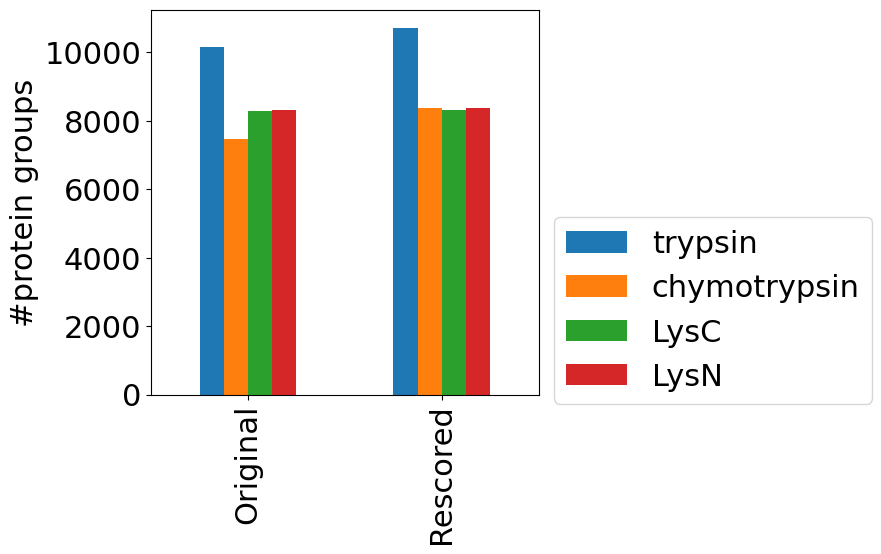

In [45]:
comparison_df = pd.DataFrame([intensities_original.count(), intensities.count()])
comparison_df.index = ['Original', 'Rescored']
ax = comparison_df.plot.bar(figsize=(5,5))
ax.legend(bbox_to_anchor=(1.0, 0.5), loc="upper left")
ax.set_ylabel('#protein groups')
comparison_df

7. Explore the identification and quantification results

Look at the overlap between the four proteases. We see that the trypsin experiment quantified the most protein groups and that the other proteases add few extra protein groups.

,
trypsin+chymotrypsin+LysN,390
trypsin+chymotrypsin+LysC+LysN,6428
trypsin+chymotrypsin+LysC,382
trypsin+chymotrypsin,744
trypsin+LysN,292
trypsin+LysC+LysN,815
trypsin+LysC,310
trypsin,1356
chymotrypsin+LysN,52
chymotrypsin+LysC+LysN,69


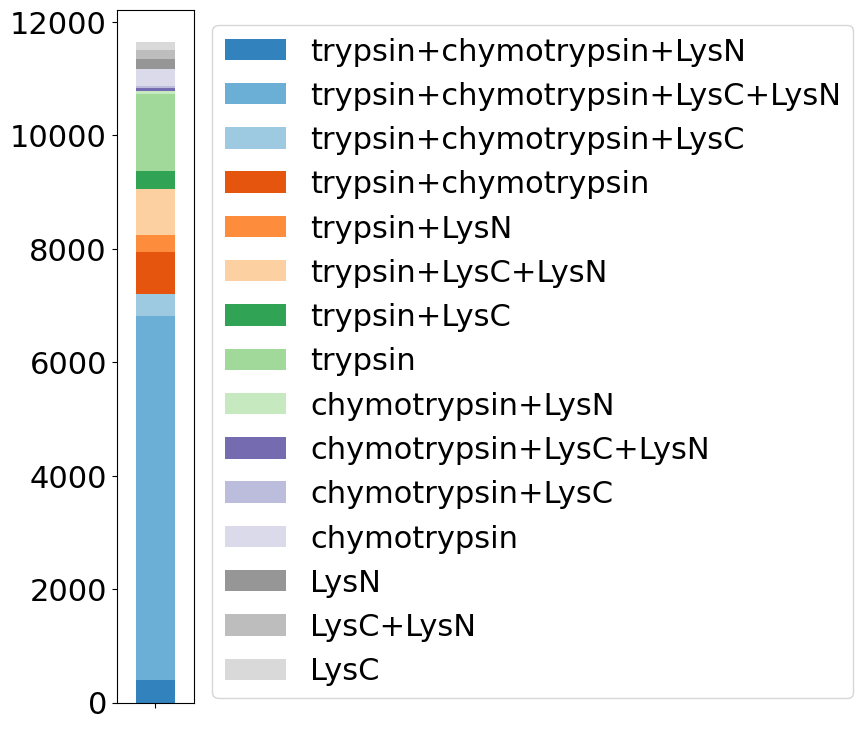

In [52]:
# NOTE: Yes, I know this would be better with venn diagrams, but did not want to install extra packages...
intensities_overlap = intensities.stack().reset_index().groupby('level_0')['level_1'].agg(list)
intensities_overlap = intensities_overlap.apply("+".join)
intensities_overlap = intensities_overlap.value_counts()
intensities_overlap = intensities_overlap.to_frame().sort_index(ascending=False).rename(columns={'level_1': ''})

ax = intensities_overlap.T.plot.bar(stacked=True, colormap='tab20c', figsize=(1,9))
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
intensities_overlap

The intensities for the trypsin experiment are higher than for LysC and LysN.

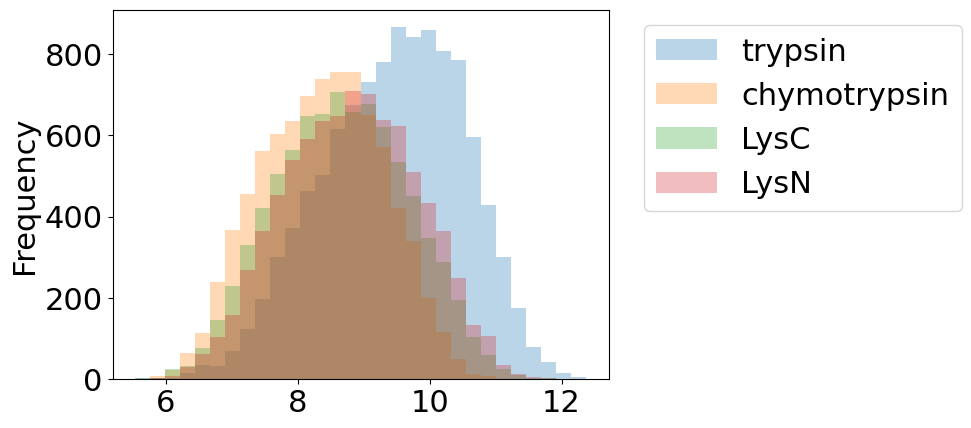

In [47]:
ax = intensities.plot.hist(bins=30, alpha=0.3)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

We see that the correlation of intensities between the LysC and LysN experiments are higher than with trypsin.

               trypsin  chymotrypsin      LysC      LysN
trypsin       1.000000      0.823597  0.788796  0.791229
chymotrypsin  0.823597      1.000000  0.744744  0.746643
LysC          0.788796      0.744744  1.000000  0.872561
LysN          0.791229      0.746643  0.872561  1.000000


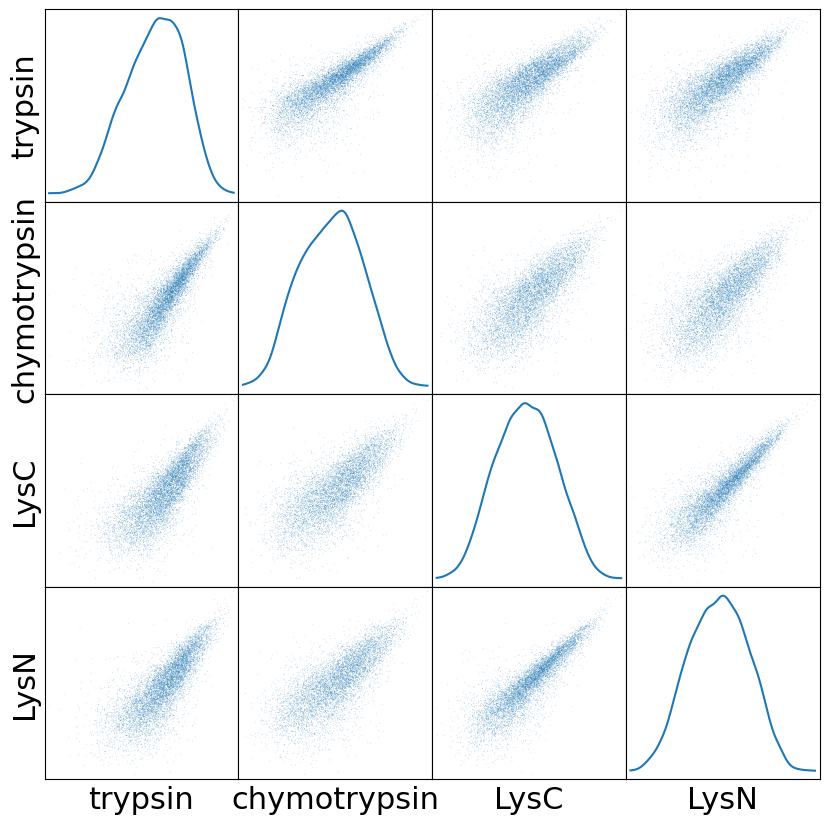

In [48]:
print(intensities.corr())
sm = pd.plotting.scatter_matrix(intensities, s=1, diagonal='kde', figsize=(10,10))
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])